In [1]:
import os, sys
import numpy as np
import pandas as pd
import tensorflow
import seaborn as sn

%matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict
from reliability_diagrams import *

In [3]:
dataset = pd.read_csv("../../results/res_89.csv", index_col = False)


In [4]:
# Override matplotlib default styling.
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

C:\Users\lucal\Desktop\Tesi\code\outdoor-geolocation\utils\calibration\reliability_diagrams.py:177: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(new_ticks)


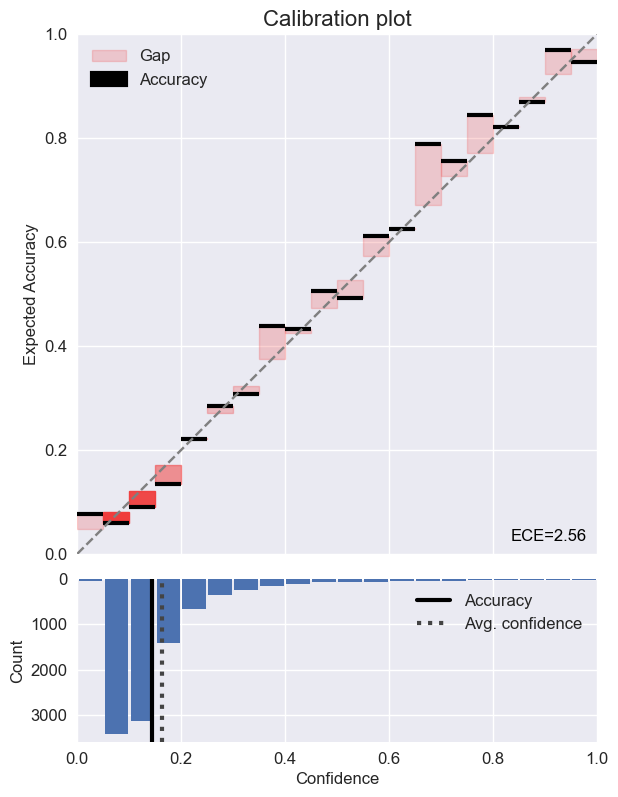

In [9]:
title = "Calibration plot"

fig = reliability_diagram(dataset["true_class"], dataset["predicted_class"], dataset["confidence"], num_bins=20, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)

In [4]:
matrix = tensorflow.math.confusion_matrix(dataset["true_class"], dataset["predicted_class"])

matrix

<tf.Tensor: shape=(89, 89), dtype=int32, numpy=
array([[71,  0,  2, ...,  0,  0,  0],
       [ 4,  1,  2, ...,  0,  1,  0],
       [15,  0, 18, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  1, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])>

<AxesSubplot:>

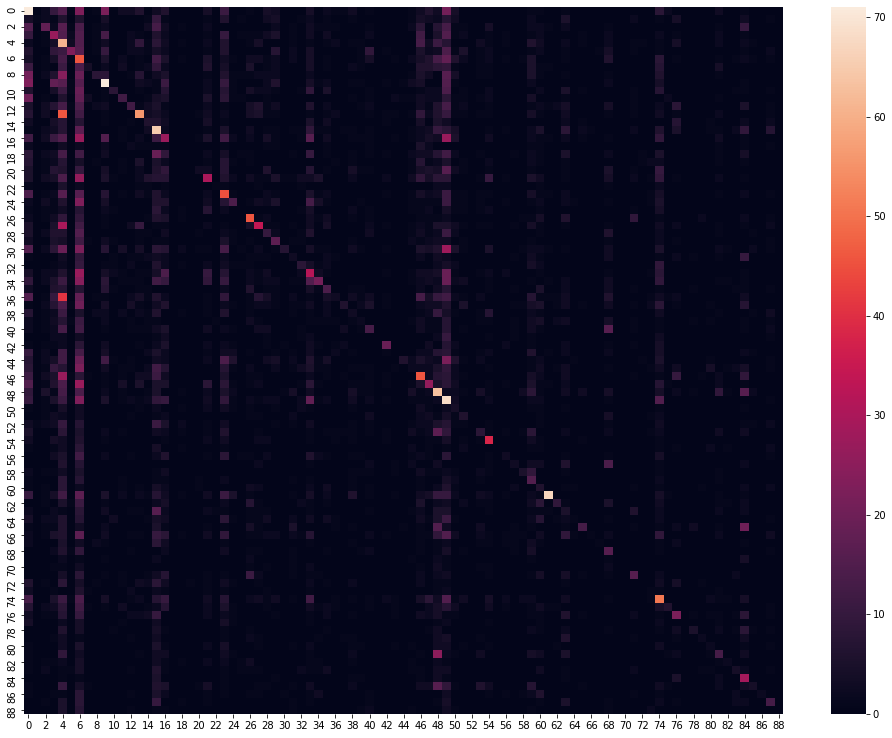

In [19]:
df_cm = pd.DataFrame(matrix.numpy())
plt.figure(figsize = (17,13))
sn.heatmap(df_cm)